In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
boston = pd.read_csv('./Datasets/HousingData.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [12]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [13]:
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [14]:
boston.dropna(inplace=True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


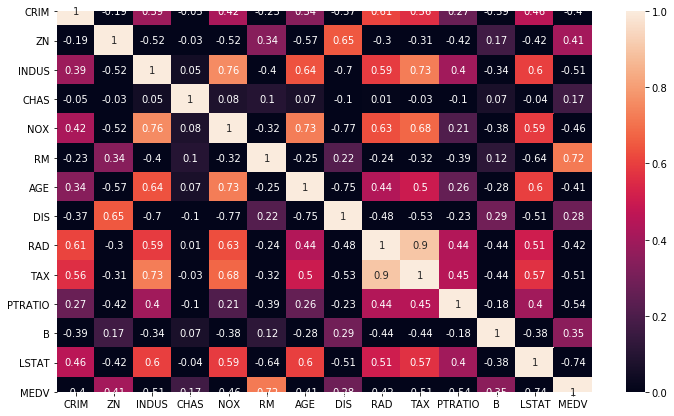

In [19]:
# Checking the correlation between the features
fig, ax = plt.subplots(figsize = (12,7))

corr_matrix = boston.corr().round(2)
sns.heatmap(data = corr_matrix , vmin = 0, vmax = 1, annot = True);


In [22]:
X = boston.iloc[:,:-1]
Y = boston.iloc[:,-1]

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 7)

In [49]:
print("X_train ", X_train)
print("\n x_test ", X_test)
print("\n y_train ", Y_train)
print("\n y_test ", Y_test)

X_train          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
142  3.32105   0.0  19.58   1.0  0.871  5.403  100.0  1.3216    5  403   
461  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671   24  666   
20   1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979    4  307   
366  3.69695   0.0  18.10   0.0  0.718  4.963   91.4  1.7523   24  666   
273  0.22188  20.0   6.96   1.0  0.464  7.691   51.8  4.3665    3  223   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
270  0.29916  20.0   6.96   0.0  0.464  5.856   42.1  4.4290    3  223   
80   0.04113  25.0   4.86   0.0  0.426  6.727   33.5  5.4007    4  281   
29   1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390    4  307   
252  0.08221  22.0   5.86   0.0  0.431  6.957    6.8  8.9067    7  330   
222  0.62356   0.0   6.20   1.0  0.507  6.879   77.7  3.2721    8  307   

     PTRATIO       B  LSTAT  
142     14.7  396.90  26.82  
461     20.2  391.43  14.65  
20      21.0

In [50]:
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
Y_pred = multiple_regressor.predict(X_test)
Y_pred

array([13.25397512, 15.17363524, 17.34079293, 19.98780758, 21.61733751,
       16.98648569, 14.0571982 , 26.03699565, 23.79487954, 33.22469424,
       18.60546498, 23.24443032, 19.82306548, 24.04751797, 30.11813333,
       24.49443897, 16.62653733, 30.43897581, 14.12546779, 42.59190792,
       26.85172427, 22.46089037, 19.76240513, 25.66469806, 38.919237  ,
       19.69029054, 16.98213892, 15.75617153, 24.30057273, 21.3194145 ,
        9.33090739,  5.25705822, 17.20676094,  9.43633022, 24.29719414,
       15.57600677, 23.84509434, 23.90960439, 34.48632173,  8.56170736,
        1.31268021, 14.71367276, 18.48916964, 26.18883196, 35.75613034,
       32.10290143, 27.68650915, 18.61851753,  5.00416395, 23.46676647,
       24.91349081, 22.71670759, 34.81049605, 28.35166786, 24.73358417,
       21.26864957, 17.59310332, 28.58997592, 45.01031144, 24.6647986 ,
       40.76301122, 31.53593824, 11.75107399, 17.28352784,  9.77124441,
       33.7475334 , 30.32707069, 11.85624737, 18.0804404 , 31.74

In [52]:
pd.DataFrame({"Actual Value":Y_test, "Predicted Value":Y_pred})

,Actual Value,Predicted Value
435,13.4,13.253975
346,17.2,15.173635
362,20.8,17.340793
464,21.4,19.987808
67,22.0,21.617338
...,...,...
203,48.5,41.480858
122,20.5,21.925214
216,23.3,27.879638
194,29.1,31.617870


In [37]:
print("Intercept : ", multiple_regressor.intercept_, "\t Co-efficent : ", multiple_regressor.coef_)

Intercept :  39.81333195314507 	 Co-efficent :  [-8.78315845e-02  4.34433507e-02  1.00083363e-01  3.50621177e+00
 -2.16413565e+01  3.61030964e+00 -3.23908457e-03 -1.42772648e+00
  2.85672703e-01 -1.33857009e-02 -9.40839775e-01  7.50990911e-03
 -5.04088059e-01]


In [42]:
# Checking the performance of the model
N = len(X)
p = len(boston.columns) - 1
r2 = metrics.r2_score(Y_test, Y_pred)

In [44]:
print("RSME : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score : ", metrics.r2_score(Y_test, Y_pred))
print("Adjusted R2 Score : ", 1 - (((1 - r2) * (N - 1)) / (N - p - 1)))

RSME :  3.868095642049412
R2 Score :  0.8340170328151426
Adjusted R2 Score :  0.8283386681482923


## Ridge

In [45]:
alpha = 0.5
ridge = Ridge(alpha=alpha)
validation_size = 0.20
seed = 7
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = seed)
ridge = ridge.fit(X_train,Y_train)
Y_pred_ridge = ridge.predict(X_test)
r2_score_ridge = r2_score(Y_test,Y_pred_ridge)
print(ridge)
print(r2_score_ridge)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
0.8384867371310714


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,Y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("MSE train : %.3f, test : %.3f" % (mean_squared_error(Y_train,y_train_pred), mean_squared_error(Y_test,y_test_pred)))
print("r2 train : %.3f,test : %.3f " % (r2_score(Y_train,y_train_pred),r2_score(Y_test,y_test_pred)))

r2_score_lasso = r2_score(Y_test,y_test_pred)
print(lasso)
print('r2 on test data : %f' % r2_score_lasso)

MSE train : 27.596, test : 23.260
r2 train : 0.657,test : 0.742 
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
r2 on test data : 0.741962


## Bagging IRIS

In [54]:
diabaties = pd.read_csv("./Datasets/diabetes.csv")
diabaties

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [55]:
diabaties.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
X = diabaties.iloc[:,:-1]
Y = diabaties.iloc[:,-1]

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 7)

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=10), n_estimators=100,bootstrap=True, oob_score=True,random_state=25)
dt_bag_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=10,
                                                        splitter='best'),
      

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt_bag_clf.predict(X_test)

print("Bagging Classifier score : ", accuracy_score(Y_test,y_pred))
print("Confusion Matrix : ", confusion_matrix(Y_test,y_pred))

Bagging Classifier score :  0.9683333333333334
Confusion Matrix :  [[380  12]
 [  7 201]]
